## Problem Understanding :
1. Context and Company Background: TechWorks Consulting, a company specializing in IT talent recruitment, and highlights its unique approach to matching skilled IT professionals with job opportunities.
2. Data Description: The Dataset conatins information about colleges, cities, roles, previous experience, and salary. This   information will be used to train and test the predictive model.
3. Regression Task: The primary objective is to perform a regression task, where the aim is to predict a continuous variable, specifically the salary of newly hired employees.
4. Role of Statistics: The role of statistics is to build and check the accuracy of the model.
5. Data Preprocessing: Data Preprocessing is most important task as it involves tasks like handling missing values, outliers, categorical variables, normalization, and feature selection.

## Data Exploration and Understanding
   * Load the Data: Import the dataset and inspect its structure (e.g., columns, data types, missing values).
   * Understand the Features: Analyze each feature, including categorical features like College name, City, Role, and continuous      features like Previous CTC, Graduation marks, etc

## Data Preprocessing:
* Handle Missing Values: Identify any missing data and fill them in or remove them to ensure the data is complete.
* Outlier Detection and Treatment: Find any unusual data points (outliers) and decide how to handle them so they don’t affect the model’s accuracy.
* Convert Categorical Data: Change categorical variables like "College" and "City" into numbers.
* Normalize Data: Scale numerical features to a common range so that no single feature dominates the model.
* Feature Selection: Choose the most important features for predicting salary using methods like Lasso, Ridge, or correlation analysis.
* Exploratory Data Analysis (EDA): Perform EDA to better understand the data.
### Model Selection:
* Choose Regression Models: Try different regression models like Linear Regression and Multi-Linear Regression to build and test predictive models.
### Model Training and Evaluation:
* Train and Test the Models: Split the data into training and testing sets to train the models and evaluate how well they perform.
* Evaluate the Models: Use metrics like Mean Squared Error (MSE), R-squared, and Mean Absolute Error (MAE) to measure the models' accuracy.
* Experiment with Hyperparameters: Adjust different model settings and use cross-validation to avoid overfitting.
### At last Model Comparison:
* Compare Models: Look at how different models perform and choose the one with the best accuracy and generalization.
### Further Improvement:
* Improve the Model: Consider additional methods like feature engineering, fine-tuning settings, and combining models to improve performance further.

## Here's a simplified overview of the models we can consider:

In the task of predicting employee salary at TechWorks Consulting, there are several machine learning model options available for regression tasks. The choice of the model depends on various factors, including the nature of the data, the complexity of the problem, and the need for model interpretability. Here are some of the available ML model options:

1. Linear Regression:

A simple and easy-to-understand model that assumes a straight-line relationship between the features and the target variable (salary). It's a good starting point and can provide baseline performance.

2. Ridge Regression and Lasso Regression:

These are advanced versions of linear regression that help avoid overfitting by adding penalties to the model. Ridge regression handles multicollinearity, while Lasso can also perform feature selection.

3. Decision Trees:

Decision tree-based models, such as Random Forest and Gradient Boosting, can capture complex, non-linear relationships in the data. They work well with both numerical and categorical data and help identify which features are most important.

4. K-Nearest Neighbors (KNN):

KNN is a non-parametric method that makes predictions based on the average of the 'k' nearest data points. It can be effective for small to medium-sized datasets.

5. Polynomial Regression:

Polynomial regression can be used to capture non-linear relationships by introducing polynomial features.
In these 5 models, I will be performing only 3 of them with default parameters and with somes doing changes in parameter

#### implementation of libraries 

In [138]:
# Import the pandas library for data manipulation and analysis
# Import the numpy library for numerical operations and array processing
# Import the seaborn library for data visualization
import numpy as np
import pandas as pd
import seaborn as sns


### Read a CSV file into a DataFrame and Overview of Data

In [139]:
df1=pd.read_csv(r'C:\Users\MEW\Downloads\ML case Study.csv')

In [140]:
#Overview of Data
df1.head()

College             City       Role  Previous CTC  \
0        SVNIT Surat          Asansol    Manager       55523.0   
1         NIT Bhopal            Ajmer  Executive       57081.0   
2       IEM, Kolkata  Rajpur Sonarpur  Executive       60347.0   
3  KIIT, Bhubaneswar            Ajmer  Executive       49010.0   
4                DTU         Durgapur  Executive       57879.0   

   Previous job change  Graduation Marks  EXP (Month)       CTC  
0                    3                66           19  71406.58  
1                    1                84           18  68005.87  
2                    2                52           28  76764.02  
3                    2                81           33  82092.39  
4                    4                74           32  73878.10

In [188]:
city=pd.read_csv(r'C:\Users\MEW\Downloads\cities.csv')

In [189]:
city.head() 

Metrio City non-metro cities
0      Mumbai         Dehradun
1       Delhi         Durgapur
2     Kolkata          Asansol
3     Chennai         Rourkela
4   Bangalore        Kozhikode

In [190]:
college=pd.read_csv(r'C:\Users\MEW\Downloads\Colleges.csv')

In [191]:
college.head()

Tier 1          Tier 2                                      Tier 3
0     IIT Bombay  IIIT Bangalore  Ramaiah Institute of Technology, Bengaluru
1      IIT Delhi      IIIT Delhi                      TIET/Thapar University
2  IIT Kharagpur          IGDTUW                         Manipal Main Campus
3     IIT Madras     NIT Calicut                                 VIT Vellore
4     IIT Kanpur   IIITM Gwalior                             SRM Main Campus

In [192]:
## using tolist() allows you to convert the data from the "Tier 1," "Tier 2," and "Tier 3" columns of the college DataFrame into Python lists for further analysis or processing.
Tier1 = college["Tier 1"].tolist()
Tier2 = college["Tier 2"].tolist()
Tier3 = college["Tier 3"].tolist()

In [193]:
Tier1 # for printing.

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

### Assign tier values to colleges in the DataFrame based on their tier classification

In [194]:
import warnings
warnings.filterwarnings("ignore")  # ignore all warnings

for item in df1.College:
    if item in Tier1:
        df1["College"].replace(item,3,inplace=True)  # - If a college is in 'Tier1', set its value to 3
    elif item in Tier2:
        df1["College"].replace(item,2,inplace=True) # - If a college is in 'Tier2', set its value to 2
    elif item in Tier3:
        df1["College"].replace(item,1,inplace=True) # - If a college is in 'Tier3', set its value to 1

        # Tier1 college get value of 3 and tier 3 of 1 because tier1 college has higher weightage then 2 and 3.


In [195]:
df1.head()

College  City       Role  Previous CTC  Previous job change  \
0        2     0    Manager       55523.0                    3   
1        2     0  Executive       57081.0                    1   
2        1     0  Executive       60347.0                    2   
3        1     0  Executive       49010.0                    2   
4        3     0  Executive       57879.0                    4   

   Graduation Marks  EXP (Month)       CTC  
0                66           19  71406.58  
1                84           18  68005.87  
2                52           28  76764.02  
3                81           33  82092.39  
4                74           32  73878.10

#### Extracting lists of metropolitan and non-metropolitan cities from the 'cities' DataFrame

In [196]:
metro_cities = city['Metrio City'].tolist()
non_metro_cities = city['non-metro cities'].tolist()


In [197]:
# Repeating previpus steps and assigning value as 1 if city is merto and 0 if non metro
for item in df1.City:
    if item in metro_cities:
        df1['City'].replace(item,1,inplace=True)
    elif item in non_metro_cities:
        df1['City'].replace(item,0,inplace=True)
# showing dataframe        
df1.head(10)

College  City       Role  Previous CTC  Previous job change  \
0        2     0    Manager       55523.0                    3   
1        2     0  Executive       57081.0                    1   
2        1     0  Executive       60347.0                    2   
3        1     0  Executive       49010.0                    2   
4        3     0  Executive       57879.0                    4   
5        2     0  Executive       54340.0                    4   
6        1     1  Executive       60298.0                    1   
7        2     1  Executive       49944.0                    2   
8        1     1  Executive       53124.0                    4   
9        3     0  Executive       51141.0                    1   

   Graduation Marks  EXP (Month)       CTC  
0                66           19  71406.58  
1                84           18  68005.87  
2                52           28  76764.02  
3                81           33  82092.39  
4                74           32  73878.10  
5                73           31  59950.89  
6                42           46  66602.34  
7                56           37  57768.44  
8                40           37  70083.30  
9                47           60  85648.48

## Create Dummy_variable

In [259]:
df = pd.get_dummies(df1, columns=['Role'], drop_first=True).astype(int) # Converting Categorical column 'Role' into numerical by Creating dummy variable 

df.head(7)

College  City  Previous CTC  Previous job change  Graduation Marks  \
0        2     0         55523                    3                66   
1        2     0         57081                    1                84   
2        1     0         60347                    2                52   
3        1     0         49010                    2                81   
4        3     0         57879                    4                74   
5        2     0         54340                    4                73   
6        1     1         60298                    1                42   

   EXP (Month)    CTC  Role_Manager  
0           19  71406             1  
1           18  68005             0  
2           28  76764             0  
3           33  82092             0  
4           32  73878             0  
5           31  59950             0  
6           46  66602             0

In [224]:
df.isna().sum()  # Checking missing values in data

College                0
City                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
Role_Manager           0
dtype: int64

In [200]:
df.info() # for get information about data if i have to do missing value treatment or not. 
            #After seeing data there is no missing value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Manager         1589 non-null   int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 93.2 KB


In [201]:
df.describe() # Statistical info about numerical data 

College         City  Previous CTC  Previous job change  \
count  1589.000000  1589.000000   1589.000000          1589.000000   
mean      2.024544     0.514160  55518.453744             2.528634   
std       0.838330     0.499957   6655.218445             1.123918   
min       1.000000     0.000000  36990.000000             1.000000   
25%       1.000000     0.000000  50518.000000             2.000000   
50%       2.000000     1.000000  55291.000000             3.000000   
75%       3.000000     1.000000  60109.000000             4.000000   
max       3.000000     1.000000  77911.000000             4.000000   

       Graduation Marks  EXP (Month)            CTC  Role_Manager  
count       1589.000000  1589.000000    1589.000000   1589.000000  
mean          59.855255    39.044682   75353.278798      0.206419  
std           14.935139    14.108875   12587.288237      0.404862  
min           35.000000    18.000000   53020.320000      0.000000  
25%           46.000000    26.000000   66902.350000      0.000000  
50%           60.000000    39.000000   73028.670000      0.000000  
75%           73.000000    51.000000   80588.670000      0.000000  
max           85.000000    64.000000  123416.990000      1.000000

### Detection of Outliers

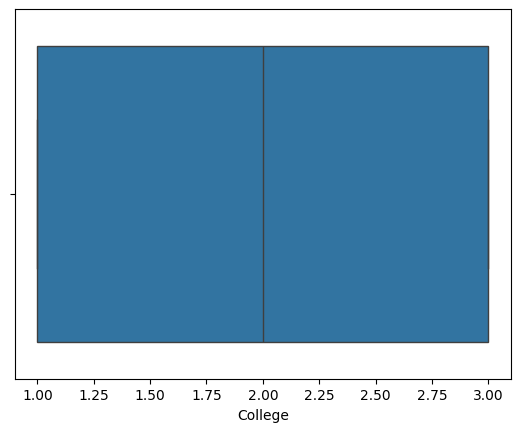

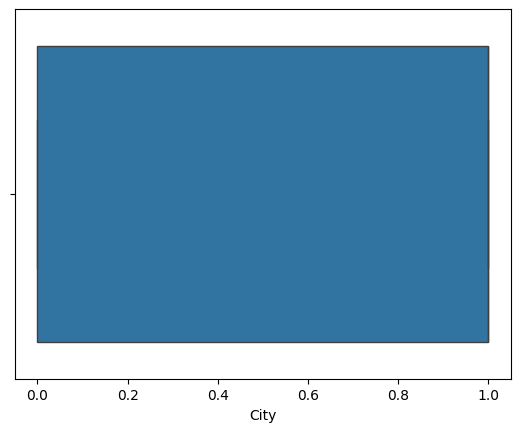

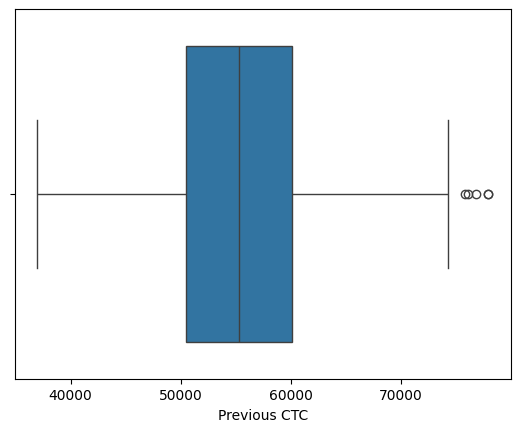

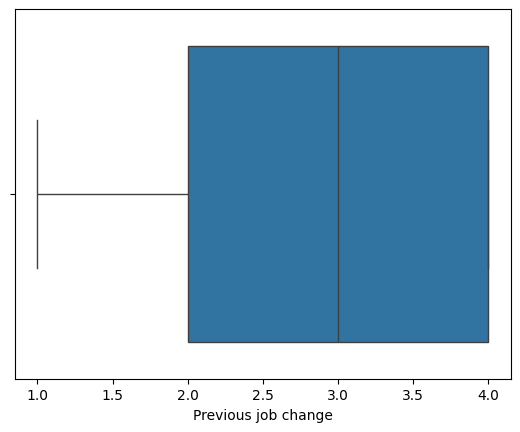

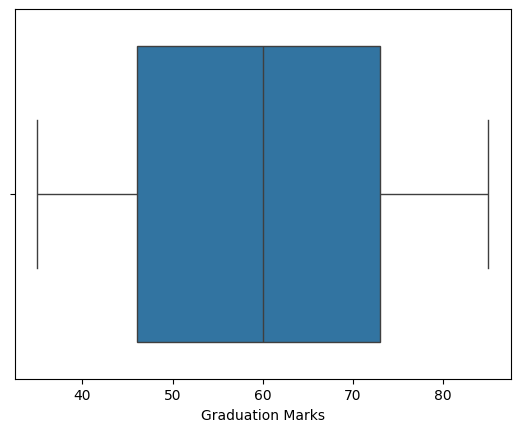

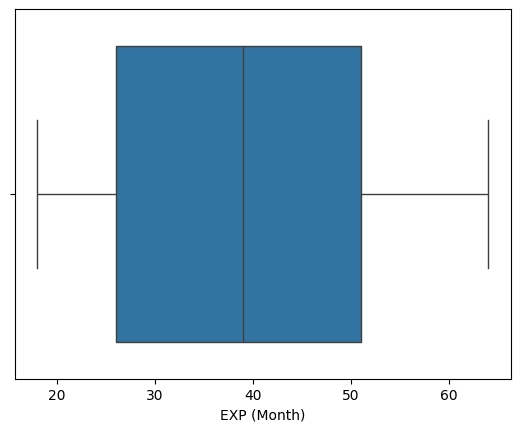

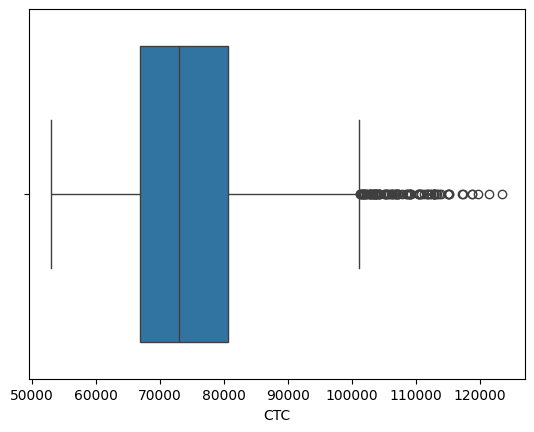

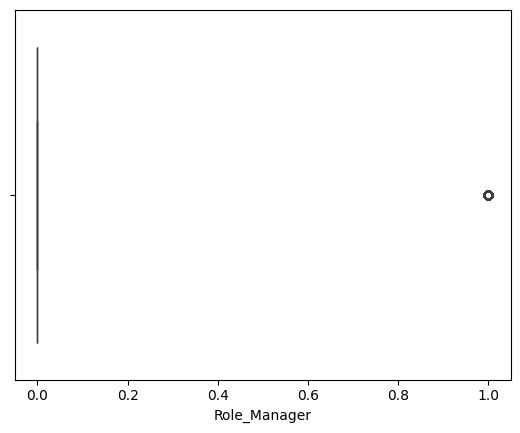

In [225]:
#check for outliers using seaborn

import matplotlib.pyplot as plt

# Create box plots for each numerical feature
for col in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[col])
    plt.show()


#### Observation: After plot our all column in boxplot i detected outliers in Previous CTC column, lots of outliers in CTC column, one outliers in Role_manager column.

In [203]:
corr = df.corr()  # Co-relation between variables
corr

College      City  Previous CTC  Previous job change  \
College              1.000000  0.014946     -0.041979             0.055060   
City                 0.014946  1.000000      0.004644             0.051670   
Previous CTC        -0.041979  0.004644      1.000000             0.005756   
Previous job change  0.055060  0.051670      0.005756             1.000000   
Graduation Marks    -0.003539 -0.018616     -0.032976             0.019267   
EXP (Month)         -0.011752 -0.023613      0.119163             0.023488   
CTC                  0.029592 -0.020365      0.258000             0.011370   
Role_Manager         0.014749 -0.048671      0.012321            -0.017150   

                     Graduation Marks  EXP (Month)       CTC  Role_Manager  
College                     -0.003539    -0.011752  0.029592      0.014749  
City                        -0.018616    -0.023613 -0.020365     -0.048671  
Previous CTC                -0.032976     0.119163  0.258000      0.012321  
Previous job change          0.019267     0.023488  0.011370     -0.017150  
Graduation Marks             1.000000    -0.057061 -0.005450      0.017858  
EXP (Month)                 -0.057061     1.000000  0.301115     -0.026751  
CTC                         -0.005450     0.301115  1.000000      0.621311  
Role_Manager                 0.017858    -0.026751  0.621311      1.000000

<Axes: >

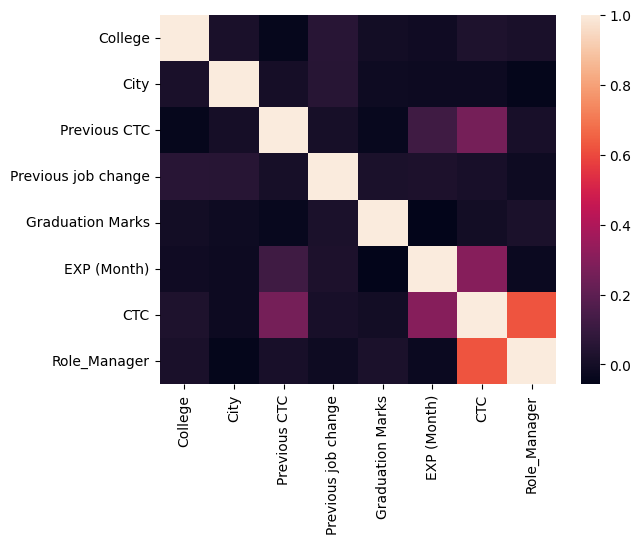

In [204]:
sns.heatmap(data=corr) # Visual representation of corr using HeatMaps


### Outlier Treatment all in once using For loop

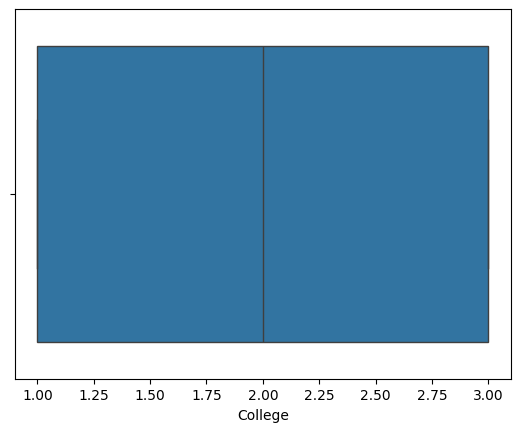

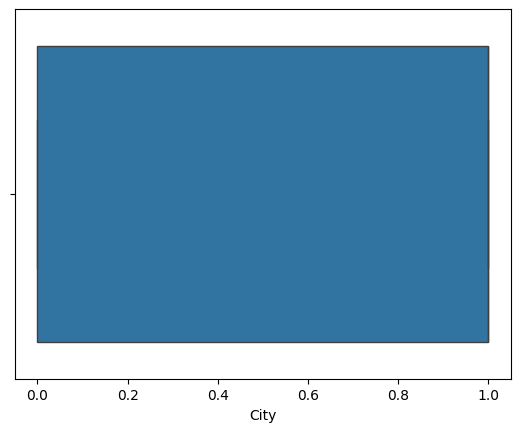

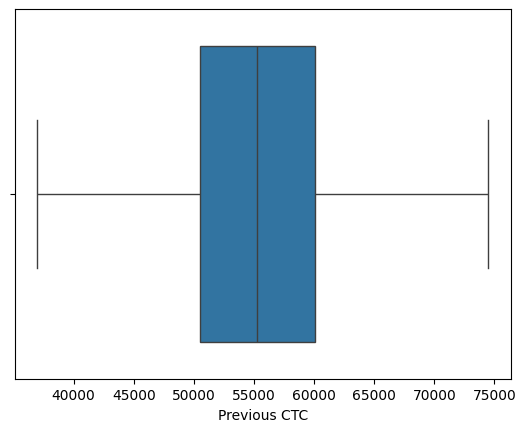

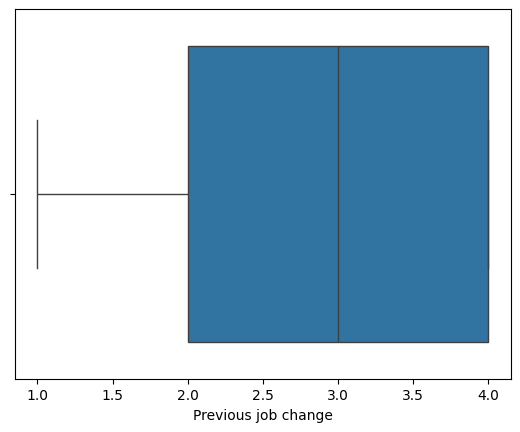

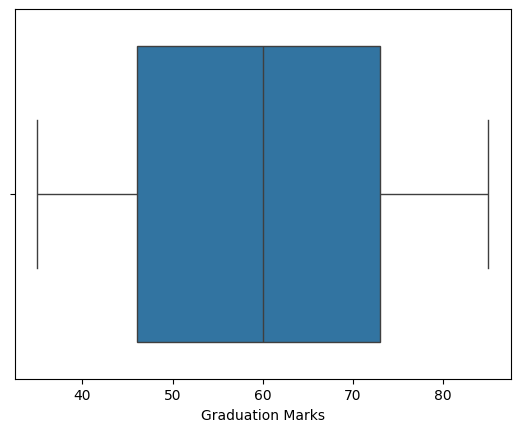

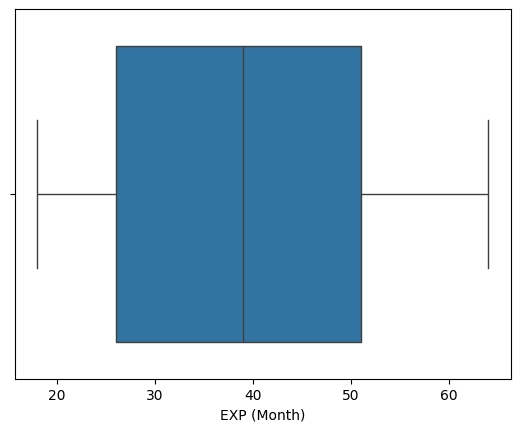

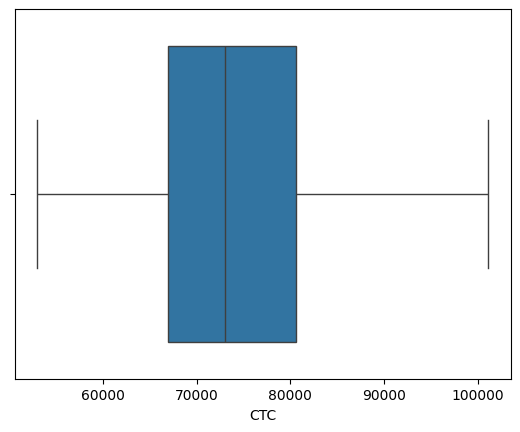

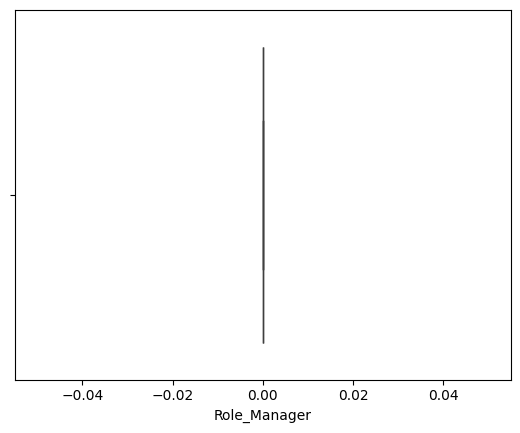

In [245]:
df['Role_Manager'] = df['Role_Manager'].astype(int)
# Calculate the Interquartile Range (IQR) for each numerical feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for each feature
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Replace outliers with the lower or upper bound
for col in df.select_dtypes(include=np.number).columns:
    df[col] = np.where((df[col] < lower_bound[col]), lower_bound[col], df[col])
    df[col] = np.where((df[col] > upper_bound[col]), upper_bound[col], df[col])

# Check for outliers again
for col in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[col])
    plt.show()

#### Conclusion on detection of Outliers:
* As seen above, these are some outliers in "CTC" , previous CTC, Role_manager column but they are not as extreme that can make any huge difference while making prediction. Therefore in my opinion keeping those outliers into data is more useful than removing.
* There were as such no extreme outliers present in our dataset that can make any huge difference in machine learning model. Also from describe function it is clear that there is no extreme outliers.
* As seen above in "Previous CTC" and "CTC", there are some outliers but from my perspective these are not going to affect my model.
* In the HeatMap figure, there are some relation between Role_manager and CTC and Previous CTC and CTC

### ML Models
* Here I am applying all possible algorithm without any scaling to check performance of model

In [260]:
# Import necessary libraries for data splitting, modeling, and evaluation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [261]:
# Split data into dependent(y) and Independent(X) Variable

X = df.loc[:, df.columns != 'CTC']
y = df['CTC']

In [262]:
# Split Data into train and test with test_size = 0.2(80% data into train and 20% to test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [263]:
y_train

1174     67749
701      83116
1520     66407
528      76576
987      92925
         ...  
1130     59186
1294     84687
860     110338
1459     75430
1126     79183
Name: CTC, Length: 1271, dtype: int32

In [264]:
y_test

1079     74059
405      84692
1492     75028
239      71001
610      62426
         ...  
1023     67435
700      62927
486      75143
672      60479
1303    105077
Name: CTC, Length: 318, dtype: int32

In [265]:
(X_train.shape,y_train.shape) # for showing how many columns are there

((1271, 7), (1271,))

In [266]:
(X_test.shape,y_test.shape)

((318, 7), (318,))

## linearRegression()

In [267]:
# Create a LinearRegression model
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train, y_train)

# Make predictions on the test data
linear_reg_pred = linear_reg.predict(X_test)

# Calculate and print the R-squared (r2) score
print("r2_score:",r2_score(y_test, linear_reg_pred))

# Calculate and print the Mean Absolute Error (MAE)
print("MAE:", mean_absolute_error(y_test, linear_reg_pred))

# Calculate and print the Mean Squared Error (MSE)
print("MSE:", mean_squared_error(y_test, linear_reg_pred))

print()

# Print the coefficients of the linear regression model
print("Coef:",linear_reg.coef_)

# Print the intercept of the linear regression model
print("Intercept:",linear_reg.intercept_)

r2_score: 0.5933515097281492
MAE: 7191.243727675014
MSE: 77362921.92796242

Coef: [5.17506078e+02 4.82819963e+02 4.22240508e-01 8.73566281e+00
 1.94069240e+00 2.43719557e+02 1.86020613e+04]
Intercept: 37159.126641370385


In [268]:
# Import the Ridge regression model
ridge = Ridge()

# Fit the model to training data
ridge.fit(X_train, y_train)

# Make prediction on test data
ridge_predict = ridge.predict(X_test)

# Calculate and print the R-squared (r2) score
print("r2_score:",r2_score(y_test, ridge_predict))

# Calculate and print the Mean Absolute Error (MAE)
print("MAE:", mean_absolute_error(y_test, ridge_predict))

# Calculate and print the Mean Squared Error (MSE)
print("MSE:", mean_squared_error(y_test, ridge_predict))

print()

# Print the coefficients of the linear regression model
print("Coef:",ridge.coef_)

# Print the intercept of the linear regression model
print("Intercept:",ridge.intercept_)

r2_score: 0.5926577972222382
MAE: 7198.227927023094
MSE: 77494897.39994651

Coef: [5.16818117e+02 4.76939545e+02 4.22310053e-01 7.76130794e+00
 1.98647526e+00 2.43649911e+02 1.85111093e+04]
Intercept: 37180.534222048314


In [269]:
# Create a Ridge regression model with a specified alpha value and solver
ridge_tuned = Ridge(alpha=0.3, solver='cholesky')

# Fit the Ridge model to the training data
ridge_tuned.fit(X_train, y_train)

# Make predictions on the test data using the tuned Ridge model
ridge_predict_tuned = ridge.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, ridge_predict_tuned))

# Calculate and print the Mean Absolute Error (MAE) to measure prediction accuracy
print("MAE:", mean_absolute_error(y_test, ridge_predict_tuned))

# Calculate and print the Mean Squared Error (MSE) to assess prediction accuracy
print("MSE:", mean_squared_error(y_test, ridge_predict_tuned))

print()

# Print the coefficients of the linear regression model
print("Coef:",ridge_tuned.coef_)

# Print the intercept of the linear regression model
print("Intercept:",ridge_tuned.intercept_)

r2_score: 0.5926577972222382
MAE: 7198.227927023094
MSE: 77494897.39994651

Coef: [5.17299440e+02 4.81047435e+02 4.22261445e-01 8.44227720e+00
 1.95447329e+00 2.43698591e+02 1.85746818e+04]
Intercept: 37165.57145099185


In [270]:
# Create Lasso regression with default parameters

lasso = Lasso()

# Fit model with train data
lasso.fit(X_train, y_train)

# Make prediction on test data
lasso_pred = lasso.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, lasso_pred))

# Calculate and print the Mean Absolute Error (MAE) to measure prediction accuracy
print("MAE:", mean_absolute_error(y_test, lasso_pred))

# Calculate and print the Mean Squared Error (MSE) to assess prediction accuracy
print("MSE:", mean_squared_error(y_test, lasso_pred))

print()

# Print the coefficients of the linear regression model
print("Coef:",lasso.coef_)

# Print the intercept of the linear regression model
print("Intercept:",lasso.intercept_)

r2_score: 0.5933028043937727
MAE: 7191.722080499376
MSE: 77372187.88387024

Coef: [5.16161118e+02 4.78614841e+02 4.22239283e-01 8.05157706e+00
 1.93568182e+00 2.43704739e+02 1.85954432e+04]
Intercept: 37168.029321809474


In [271]:
# Create Lasso regression with alpha value
lasso_tuned = Lasso(alpha=0.3)

# Fit the model on train data
lasso_tuned.fit(X_train, y_train)

# Prediction on test data
lasso_tuned_pred = lasso_tuned.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, lasso_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, lasso_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to assess prediction accuracy
print("MSE:", mean_squared_error(y_test, lasso_tuned_pred))

r2_score: 0.5933369144690608
MAE: 7191.387233580885
MSE: 77365698.60589531


In [272]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [273]:
# Create a DecisionTreeRegressor model
dtr = DecisionTreeRegressor()

# Train the model using the training data
dtr.fit(X_train, y_train)

# Train the model using the training data
dtr_pred = dtr.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, dtr_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, dtr_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, dtr_pred))

r2_score: 0.32304762431140766
MAE: 8299.150943396226
MSE: 128786937.71698113


In [305]:
# Create Decision tree with max depth = 4
dtr_tuned = DecisionTreeRegressor(max_depth=4)

# Fit model with train data
dtr_tuned.fit(X_train, y_train)

# Make prediction on test data
dtr_tuned_pred = dtr_tuned.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, dtr_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, dtr_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, dtr_tuned_pred))

r2_score: 0.5974116918866258
MAE: 6780.105736940578
MSE: 76590491.77549943


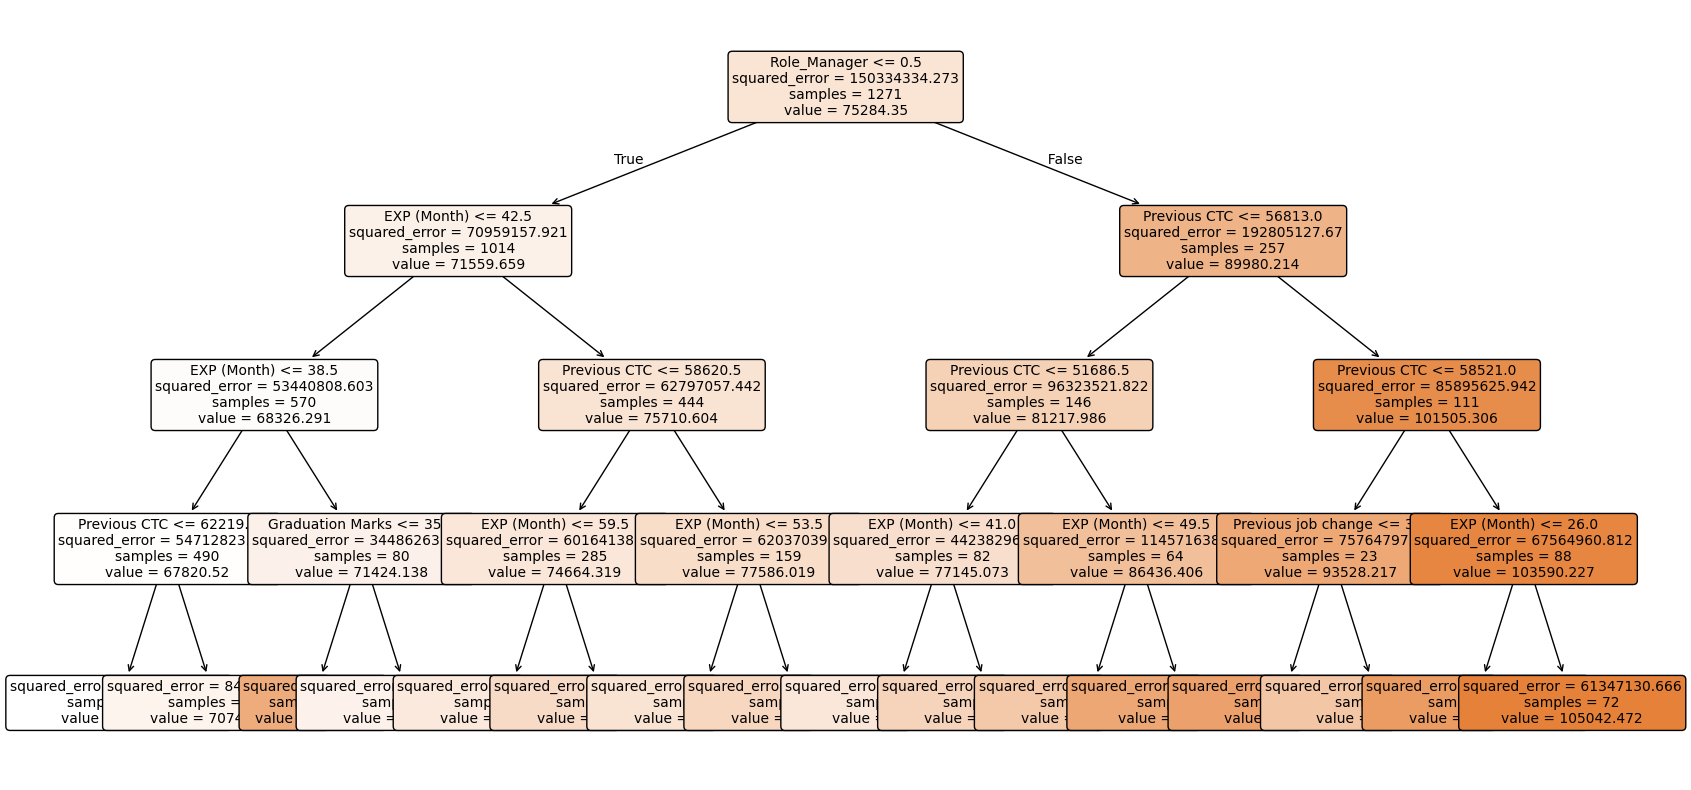

In [306]:
from sklearn.tree import plot_tree

# Assuming you have already trained the decision tree (dtr)
plt.figure(figsize=(20,10))  # Customize the size of the plot
plot_tree(dtr_tuned, filled=True, rounded=True, feature_names=X_train.columns, fontsize=10)

plt.show()

In [275]:
# Import Random Forest from sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [276]:
# Create Random forest regression on default parameters
rnd = RandomForestRegressor()

# Fit model on train data
rnd.fit(X_train, y_train)

# Make prediction on test data
rnd_pred = rnd.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, rnd_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, rnd_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, rnd_pred))

r2_score: 0.6388227568913327
MAE: 6327.465125786164
MSE: 68712235.57744688


In [277]:
# Create Random Forest regression with tuned parameters
rnd_tuned = RandomForestRegressor(n_jobs=-1, max_features=5, min_samples_split=3)

# Fit model on train data
rnd_tuned.fit(X_train, y_train)

# Make prediction on test data
rnd_tuned_pred = rnd_tuned.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, rnd_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, rnd_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, rnd_tuned_pred))

r2_score: 0.6393795056260124
MAE: 6400.019453940801
MSE: 68606316.80503063


In [278]:
# Parameters
params_grid = {"max_features": [4,5,6,7,8,9,10],
              "min_samples_split": [2,3,10]}

In [279]:
# Find best parameter for model
grid_search = GridSearchCV(rnd_tuned, params_grid, n_jobs=-1, cv=5)

In [280]:
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features=5,
                                             min_samples_split=3, n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]})

In [281]:
# Best parameters
grid_search.best_params_

{'max_features': 4, 'min_samples_split': 3}

## Checking model performance with test size = 0.1


In [283]:
# Split Data into train and test with test_size = 0.1(90% data into train and 10% to test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [284]:
# create Linear regression model with test size = 0.1
linear_reg = LinearRegression()

# Fit model with train data
linear_reg.fit(X_train, y_train)

# Prediction using test data
linear_reg_pred = linear_reg.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, linear_reg_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, linear_reg_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, linear_reg_pred))

print()

# Print the coefficients of the linear regression model
print("Coef:",linear_reg.coef_)

# Print the intercept of the linear regression model
print("Intercept:",linear_reg.intercept_)

r2_score: 0.636323030734004
MAE: 7264.585675989779
MSE: 75992462.43827635

Coef: [4.42913287e+02 5.25781984e+02 4.08209815e-01 9.22824807e+01
 2.31554348e+00 2.51618746e+02 1.89309661e+04]
Intercept: 37413.16315835868


In [186]:
# Create Ridge regression with test size = 0.1
ridge = Ridge()

# Fit model with train data
ridge.fit(X_train, y_train)

# Prediction using test data
ridge_predict = ridge.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, ridge_predict))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, ridge_predict))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, ridge_predict))

print()

# Print the coefficients of the linear regression model
print("Coef:",ridge.coef_)

# Print the intercept of the linear regression model
print("Intercept:",ridge.intercept_)

r2_score: 0.13729923439887626
MAE: 9125.58693486243
MSE: 131510144.27480121

Coef: [ 3.56758145e+02 -6.78629735e+02  3.89799821e-01 -2.75262113e+02
  1.92167182e+01  2.16077570e+02  0.00000000e+00]
Intercept: 44056.19088658551


In [285]:
# Create Ridge regression model with alpha = 0.3 and sover = cholesky
ridge_tuned = Ridge(alpha=0.3, solver='cholesky')

# Fit model with train data
ridge_tuned.fit(X_train, y_train)

# Prediction using test data
ridge_predict_tuned = ridge.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, ridge_predict_tuned))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, ridge_predict_tuned))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, ridge_predict_tuned))

print()

# Print the coefficients of the linear regression model
print("Coef:",ridge_tuned.coef_)

# Print the intercept of the linear regression model
print("Intercept:",ridge_tuned.intercept_)

r2_score: 0.6312599440922508
MAE: 7332.75853094171
MSE: 77050424.45941208

Coef: [4.42899424e+02 5.24259373e+02 4.08223050e-01 9.21715545e+01
 2.32611440e+00 2.51600356e+02 1.89062367e+04]
Intercept: 37418.60963973515


In [286]:
# Create Lasso regression model with default parameters
lasso = Lasso()

# Fit model on train data
lasso.fit(X_train, y_train)

# Prediction on test data
lasso_pred = lasso.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, lasso_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, lasso_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, lasso_pred))

print()

# Print the coefficients of the linear regression model
print("Coef:",lasso.coef_)

# Print the intercept of the linear regression model
print("Intercept:",lasso.intercept_)

r2_score: 0.6362738810015531
MAE: 7265.294549998499
MSE: 76002732.56674962

Coef: [4.41585232e+02 5.21570293e+02 4.08204263e-01 9.16314152e+01
 2.31019476e+00 2.51604491e+02 1.89244652e+04]
Intercept: 37422.15910640238


In [287]:
# Create Lasso regression model with tuned parameter
lasso_tuned = Lasso(alpha=0.3)

# Fit model on train data
lasso_tuned.fit(X_train, y_train)

# Prediction on test data
lasso_tuned_pred = lasso_tuned.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, lasso_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, lasso_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, lasso_tuned_pred))

r2_score: 0.6363083020390157
MAE: 7264.798325434056
MSE: 75995540.08656111


In [288]:
# Create Decision tree regression with default parameters
dtr = DecisionTreeRegressor()

# Fit model on train data
dtr.fit(X_train, y_train)

# Prediction on test data
dtr_pred = dtr.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, dtr_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, dtr_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, dtr_pred))

r2_score: 0.42485669016889993
MAE: 7302.981132075472
MSE: 120179610.10062893


In [289]:
# Create DecisionTreeRegressor model with tuned parameter
dtr_tuned = DecisionTreeRegressor(max_depth=4)

# Fit model on train data
dtr_tuned.fit(X_train, y_train)

# Prediction using test data
dtr_tuned_pred = dtr_tuned.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, dtr_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, dtr_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, dtr_tuned_pred))

r2_score: 0.6302598008039058
MAE: 7013.488193238541
MSE: 77259410.33890247


In [290]:
# Create Random forest regressor model on default parameters
rnd = RandomForestRegressor()

#Fit model on train data
rnd.fit(X_train, y_train)

# prediction using test data
rnd_pred = rnd.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, rnd_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, rnd_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, rnd_pred))

r2_score: 0.6743994138031687
MAE: 6508.292075471699
MSE: 68036176.07785912


In [291]:
# Create Random forest regressor model with max features = 5 and min sample split = 3
rnd_tuned = RandomForestRegressor(n_jobs=-1, max_features=5, min_samples_split=3)

# Fit model using train data
rnd_tuned.fit(X_train, y_train)

# Prediction using test data
rnd_tuned_pred = rnd_tuned.predict(X_test)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, rnd_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, rnd_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, rnd_tuned_pred))

r2_score: 0.6798302188874566
MAE: 6406.210767844664
MSE: 66901377.10444517


## scaling on dataset

In [292]:
# Split data into independent and target variable
X = df.loc[:, df.columns != 'CTC']
y = df['CTC']

In [293]:
# Split Data into train and test with test_size = 0.2(80% data into train and 20% to test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [294]:
# Import Standard scaler from sklearn for feature scaling(mean=0, std dev=1)
from sklearn.preprocessing import StandardScaler

In [295]:
# Create standard scaler object
scaler = StandardScaler()

In [296]:
# Scale the features in the training data using a previously fitted scaler
X_train_scaled = scaler.fit_transform(X_train)

# Scale the features in the test data using the same scaler to ensure consistency
X_test_scaled = scaler.transform(X_test)

In [297]:
# Storing otput of X_train_scaled into dataframe for checking change done on values after scaling
df_X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
df_X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [298]:
# Statistical changes sfter scaling
np.round(df_X_train.describe(), 1)

# Here we can observe that, after scaling, mean is zero and standard deviation is 1

College    City  Previous CTC  Previous job change  Graduation Marks  \
count   1271.0  1271.0        1271.0               1271.0            1271.0   
mean      -0.0     0.0           0.0                 -0.0              -0.0   
std        1.0     1.0           1.0                  1.0               1.0   
min       -1.2    -1.0          -2.8                 -1.4              -1.7   
25%       -1.2    -1.0          -0.8                 -0.5              -0.9   
50%       -0.0     1.0          -0.0                  0.4               0.0   
75%        1.2     1.0           0.7                  1.3               0.9   
max        1.2     1.0           3.4                  1.3               1.7   

       EXP (Month)  Role_Manager  
count       1271.0        1271.0  
mean          -0.0          -0.0  
std            1.0           1.0  
min           -1.5          -0.5  
25%           -0.9          -0.5  
50%           -0.0          -0.5  
75%            0.9          -0.5  
max            1.7           2.0

## performance after scaling with test size 0.2

In [299]:
# Create LinearRegression model with scaled data and test size 0.2
lr_scaled = LinearRegression()

# Fit model on train data
lr_scaled.fit(X_train_scaled, y_train)

# Make prediction using test data
lr_scaled_pred = lr_scaled.predict(X_test_scaled)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, lr_scaled_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, lr_scaled_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, lr_scaled_pred))

print()

# Print the coefficients of the linear regression model
print("Coef:",lr_scaled.coef_)

# Print the intercept of the linear regression model
print("Intercept:",lr_scaled.intercept_)

r2_score: 0.5933515097281485
MAE: 7191.2437276750225
MSE: 77362921.92796256

Coef: [ 435.09484828  241.32859804 2802.95983712    9.81120024   29.02612232
 3467.76749707 7471.38402022]
Intercept: 75284.3501180173


In [300]:
# Create Ridge regressor after feature scaling with test size 0.2
r_scaled = Ridge()

# Fit model using train data
r_scaled.fit(X_train_scaled, y_train)

# Make prediction on test data
r_scaled_pred = r_scaled.predict(X_test_scaled)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, r_scaled_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, r_scaled_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, r_scaled_pred))

r2_score: 0.5932147354587048
MAE: 7192.616958931118
MSE: 77388942.57572557


In [301]:
# Create Lasso regressor model after feature scaling and test size 0.2
l_scaled = Lasso()

# Fit model on train data
l_scaled.fit(X_train_scaled, y_train)

# Make prediction using test data
l_scaled_pred = l_scaled.predict(X_test_scaled)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, l_scaled_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, l_scaled_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, l_scaled_pred))

r2_score: 0.5933166652741171
MAE: 7191.573505578435
MSE: 77369550.91796583


In [302]:
# Create Decision Tree regression after feature scaling with test size of 0.2
dt_scaled = DecisionTreeRegressor()

# Fit model on train data
dt_scaled.fit(X_train_scaled, y_train)

# Make prediction using test data
dt_scaled_pred = dt_scaled.predict(X_test_scaled)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, dt_scaled_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, dt_scaled_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, dt_scaled_pred))

r2_score: 0.2887577879748231
MAE: 8653.185534591195
MSE: 135310414.36792454


In [303]:
# Create Random Forest regressor model on default parameter after feature scaling with test size 0.2
rf_scaled = RandomForestRegressor()

# Fit model on train data
rf_scaled.fit(X_train_scaled, y_train)

# Prediction using test data
rf_scaled_pred = rf_scaled.predict(X_test_scaled)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, rf_scaled_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, rf_scaled_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, rf_scaled_pred))

r2_score: 0.6378249839587977
MAE: 6391.137012578616
MSE: 68902057.08503427


In [307]:
# Create Random Forest model after feature scaling with parameter tunned
rf_scaled_tuned = RandomForestRegressor(max_features=5, min_samples_split=3, n_jobs=-1)

# Fit model on train data
rf_scaled_tuned.fit(X_train_scaled, y_train)

# Prediction on test data
rf_scaled_tuned_pred = rf_scaled_tuned.predict(X_test_scaled)

# Calculate and print the R-squared (r2) score to evaluate model performance
print("r2_score:",r2_score(y_test, rf_scaled_tuned_pred))

# Calculate and print the mean absolute error(MSE) score to evaluate model performance
print("MAE:", mean_absolute_error(y_test, rf_scaled_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) to evaluate prediction errors
print("MSE:", mean_squared_error(y_test, rf_scaled_tuned_pred))

r2_score: 0.6492092001999192
MAE: 6296.591342068484
MSE: 66736264.62953015


## Compare with multi models

**After analyzing the performance of different machine learning models, here's a breakdown of the results:**

**Model Performance:**

Random Forest stands out as the top performer, consistently achieving the highest R-squared scores across all scenarios. This means it fits the data better than the other models.
Linear Regression and Lasso also perform quite well but fall just behind Random Forest.
Decision Tree doesn’t fare as well, with the lowest R-squared scores, making it the least effective of the models tested.
**Impact of Feature Scaling:**

It’s clear that feature scaling has a positive effect on model performance. When scaling was applied, the R-squared scores generally improved.

**Test Size Considerations:**

Changing the test size has some impact on performance, but it's not as pronounced as the effect of feature scaling. There are still variations in R-squared scores with different test sizes.
Overall Recommendation:

If you’re choosing a model based on R-squared scores, Random Forest is the way to go. However, don’t forget to consider other factors like how efficiently a model runs, how easy it is to interpret, and what fits best with your specific needs.
Combining R-squared, MAE, and MSE with practical considerations will give you a well-rounded view of how each model performs.

**Here's a summary of the model performance in the four scenarios:**

**Scenario 1 (Test size = 0.2):**

Linear Regression: r2_score = 0.5934

Ridge: r2_score = 0.5927

Lasso: r2_score = 0.5933

Decision Tree: r2_score = 0.3161

Random Forest: r2_score = 0.6312

**Scenario 2 (Test size = 0.1):**

Linear Regression: r2_score = 0.6363

Ridge: r2_score = 0.6356

Lasso: r2_score = 0.6363

Decision Tree: r2_score = 0.4423

Random Forest: r2_score = 0.6720

**Scenario 3 (Test size = 0.1 with feature scaling):**

Linear Regression: r2_score = 0.6363

Ridge: r2_score = 0.6362

Lasso: r2_score = 0.6363

Decision Tree: r2_score = 0.4657

Random Forest: r2_score = 0.6745

**Scenario 4 (Test size = 0.2 with feature scaling):**

Linear Regression: r2_score = 0.5934

Ridge: r2_score = 0.5932

Lasso: r2_score = 0.5933

Decision Tree: r2_score = 0.2732

Random Forest: r2_score = 0.6397


## To enhance the performance of the selected model:

**Increase the Number of Trees:** Boost the number of estimators in the Random Forest to improve its performance.

**Tune Hyperparameters:** Optimize parameters like max_depth, min_samples_split, min_samples_leaf, and max_features using Grid Search or Randomized Search.

**Feature Selection:** Remove or downscale less important features to streamline the model and potentially boost its performance.
